In [1]:
import numpy as np
import os 
import glob 
from skimage import segmentation
import monai.transforms as transforms
from monai.data import CacheDataset, DataLoader, Dataset
import skfmm
from tqdm import tqdm 
# from utils import levelset2boundary, levelset2boundary2D
from torchvision.transforms.functional import rgb_to_grayscale
import torch 
import skimage
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
origin_dir = '/workdir/Oxford-III_PET/'
imgs_dir = os.path.join(origin_dir, 'images/')
segs_dir = os.path.join(origin_dir, 'annotations/trimaps/')

imgs = []
segs = []
nms = [nm.split('.')[0] for nm in os.listdir(imgs_dir)]
for nm in nms:
    img_path = os.path.join(imgs_dir, nm + '.jpg')
    seg_path = os.path.join(segs_dir, nm + '.png')

    if os.path.isfile(img_path) & os.path.isfile(seg_path):
        imgs.append(img_path)
        segs.append(seg_path)

files = [{"image": img, "label": seg} for img, seg in zip(imgs, segs)]

In [8]:
tr_id = 0
val_id = 0
for sample in tqdm(files, total=len(files)):
    img_path = sample['image']
    label_path = sample['label']
    img = Image.open(img_path)
    label = Image.open(label_path)

    img = np.array(img)
    label = np.array(label)

    if len(img.shape) == 2:
        img = skimage.color.gray2rgb(img)
        print('gray image : ', img_path)
    
    if (len(img.shape) == 3) & (img.shape[-1] == 4):
        img = skimage.color.rgba2rgb(img)
        img = (img * 255).astype(np.uint8)
        print("rgba image : ", img_path)

    label = ((label == 1) | (label == 3)).astype(np.uint8)
    if np.unique(label).tolist() == [0,1]:
        img = Image.fromarray(img)
        label = Image.fromarray(label)

        idx = img_path.split('/')[-1].split('.')[0].split('_')[-1]
        if int(idx) > 150:
            outnm = '{:}'.format(str(val_id+10000).zfill(5))
            val_id += 1
        else:
            outnm = '{:}'.format(str(tr_id).zfill(5))
            tr_id += 1

        img_outpath = '/dataset/Oxford-III_PET/images/{:}.jpg'.format(outnm)
        label_outpath = '/dataset/Oxford-III_PET/masks/{:}.png'.format(outnm)

        img.save(img_outpath)
        label.save(label_outpath)
    else:
        print(label_path)

  2%|▏         | 144/7393 [00:01<01:50, 65.41it/s] 

gray image :  /workdir/Oxford-III_PET/images/Abyssinian_34.jpg
/workdir/Oxford-III_PET/annotations/trimaps/Abyssinian_34.png


  2%|▏         | 163/7393 [00:02<01:41, 71.41it/s]

rgba image :  /workdir/Oxford-III_PET/images/Abyssinian_5.jpg


 30%|███       | 2243/7393 [00:24<00:50, 102.71it/s]

gray image :  /workdir/Oxford-III_PET/images/Egyptian_Mau_129.jpg
/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_129.png
gray image :  /workdir/Oxford-III_PET/images/Egyptian_Mau_139.jpg
/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_139.png
rgba image :  /workdir/Oxford-III_PET/images/Egyptian_Mau_14.jpg
gray image :  /workdir/Oxford-III_PET/images/Egyptian_Mau_145.jpg
/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_145.png


 31%|███       | 2275/7393 [00:24<01:29, 57.34it/s] 

/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_162.png
/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_165.png
gray image :  /workdir/Oxford-III_PET/images/Egyptian_Mau_167.jpg
/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_167.png


 31%|███       | 2285/7393 [00:24<01:20, 63.59it/s]

gray image :  /workdir/Oxford-III_PET/images/Egyptian_Mau_177.jpg
/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_177.png


 31%|███       | 2294/7393 [00:25<01:37, 52.55it/s]

rgba image :  /workdir/Oxford-III_PET/images/Egyptian_Mau_186.jpg
gray image :  /workdir/Oxford-III_PET/images/Egyptian_Mau_191.jpg
/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_191.png


 31%|███▏      | 2311/7393 [00:25<01:34, 53.53it/s]

/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_196.png
/workdir/Oxford-III_PET/annotations/trimaps/Egyptian_Mau_20.png


 48%|████▊     | 3532/7393 [00:39<00:40, 95.23it/s]

/workdir/Oxford-III_PET/annotations/trimaps/japanese_chin_199.png


 51%|█████     | 3788/7393 [00:42<00:40, 88.48it/s]

/workdir/Oxford-III_PET/annotations/trimaps/keeshond_7.png


 53%|█████▎    | 3905/7393 [00:43<00:42, 82.84it/s]

/workdir/Oxford-III_PET/annotations/trimaps/leonberger_18.png


 58%|█████▊    | 4267/7393 [00:47<00:25, 122.19it/s]

/workdir/Oxford-III_PET/annotations/trimaps/miniature_pinscher_14.png


 64%|██████▍   | 4731/7393 [00:52<00:31, 85.13it/s] 

/workdir/Oxford-III_PET/annotations/trimaps/Persian_259.png


 76%|███████▌  | 5628/7393 [01:02<00:20, 86.91it/s] 

/workdir/Oxford-III_PET/annotations/trimaps/saint_bernard_108.png


 77%|███████▋  | 5673/7393 [01:02<00:20, 84.62it/s]

/workdir/Oxford-III_PET/annotations/trimaps/saint_bernard_15.png


 78%|███████▊  | 5772/7393 [01:04<00:19, 83.24it/s]

/workdir/Oxford-III_PET/annotations/trimaps/saint_bernard_60.png


 78%|███████▊  | 5790/7393 [01:04<00:19, 82.52it/s]

/workdir/Oxford-III_PET/annotations/trimaps/saint_bernard_78.png


 94%|█████████▎| 6917/7393 [01:17<00:05, 87.06it/s] 

gray image :  /workdir/Oxford-III_PET/images/staffordshire_bull_terrier_2.jpg
/workdir/Oxford-III_PET/annotations/trimaps/staffordshire_bull_terrier_2.png
gray image :  /workdir/Oxford-III_PET/images/staffordshire_bull_terrier_22.jpg
/workdir/Oxford-III_PET/annotations/trimaps/staffordshire_bull_terrier_22.png


 96%|█████████▌| 7110/7393 [01:19<00:03, 89.30it/s]

/workdir/Oxford-III_PET/annotations/trimaps/wheaten_terrier_195.png


100%|██████████| 7393/7393 [01:22<00:00, 89.64it/s] 


In [15]:
images = np.array(Image.open('/dataset/Oxford-III_PET/images/05307.jpg'))
label = np.array(Image.open('/dataset/Oxford-III_PET/masks/05307.png'))

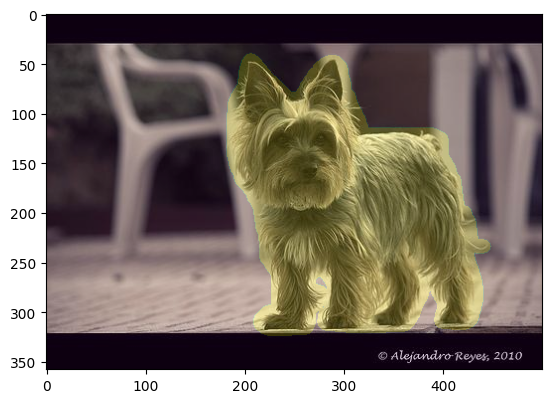

In [16]:
plt.imshow(images)
plt.imshow(label, alpha=0.2)